In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding='latin1')
data.tail()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class
180518,PAYMENT,4,4,168.949997,383.980011,Shipping on time,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 18:54,Standard Class


In [5]:
data.shape

(180519, 53)

There are total of 53 columns in the datset but we need to cut it down to 10 or close to 10 features

Days for shipping(real),(scheduled),shipping mode,order status,order region,order state,order item quantity,order item discount rate,order item profit ratio,product category,product weight,shipping date

In [6]:
required_columns = [
        'Days for shipping (real)',
        'Days for shipment (scheduled)',
        'Shipping Mode',
        'Order Status',
        'Order Region',
        'Delivery Status',
        'Order State',
        'Order Item Quantity',
        'Order Item Discount Rate',
        'Order Item Profit Ratio',
        'Product Price',
        'Category Name',
        'shipping date (DateOrders)',
        'Late_delivery_risk'
]

In [7]:
new_data = data[required_columns]

In [8]:
new_data.head()

,Days for shipping (real),Days for shipment (scheduled),Shipping Mode,Order Status,Order Region,Delivery Status,Order State,Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,Category Name,shipping date (DateOrders),Late_delivery_risk
0,3,4,Standard Class,COMPLETE,Southeast Asia,Advance shipping,Java Occidental,1,0.04,0.29,327.75,Sporting Goods,2/3/2018 22:56,0
1,5,4,Standard Class,PENDING,South Asia,Late delivery,Rajastán,1,0.05,-0.80,327.75,Sporting Goods,1/18/2018 12:27,1
2,4,4,Standard Class,CLOSED,South Asia,Shipping on time,Rajastán,1,0.06,-0.80,327.75,Sporting Goods,1/17/2018 12:06,0
3,3,4,Standard Class,COMPLETE,Oceania,Advance shipping,Queensland,1,0.07,0.08,327.75,Sporting Goods,1/16/2018 11:45,0
4,2,4,Standard Class,PENDING_PAYMENT,Oceania,Advance shipping,Queensland,1,0.09,0.45,327.75,Sporting Goods,1/15/2018 11:24,0


In [9]:
new_data.isnull().sum()

,0
Days for shipping (real),0
Days for shipment (scheduled),0
Shipping Mode,0
Order Status,0
Order Region,0
Delivery Status,0
Order State,0
Order Item Quantity,0
Order Item Discount Rate,0
Order Item Profit Ratio,0


IT DOESN'T CONTAIN ANY MISSING VALUES

In [10]:
late_count = new_data[new_data['Late_delivery_risk'] == 1].shape[0]
ontime_count = new_data[new_data['Late_delivery_risk'] == 0].shape[0]
print(late_count)
print(ontime_count)

98977
81542


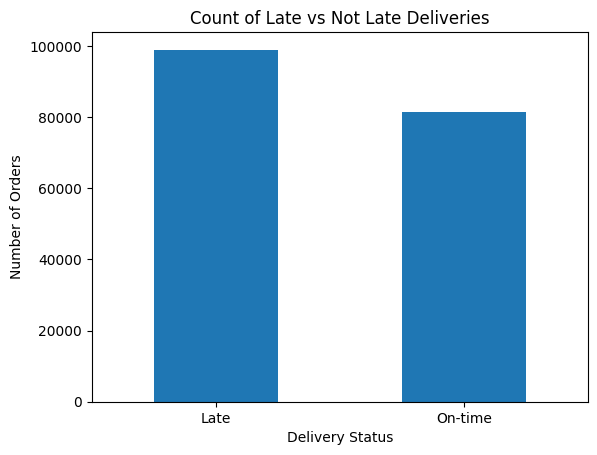

In [11]:
delivery_counts = pd.Series({
    'Late': late_count,
    'On-time': ontime_count
})
delivery_counts.plot(kind='bar')
plt.xlabel('Delivery Status')
plt.ylabel('Number of Orders')
plt.title('Count of Late vs Not Late Deliveries')
plt.xticks(rotation=0)
plt.show()

In [12]:
numeric_col = [
    'Days for shipping (real)',
    'Days for shipment (scheduled)',
    'Order Item Quantity',
    'Order Item Discount Rate',
    'Order Item Profit Ratio',
    'Product Price'
]

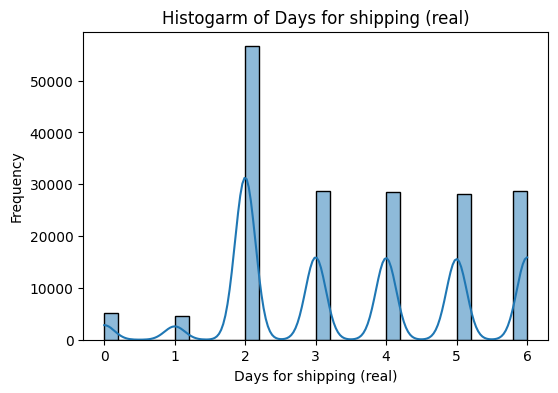

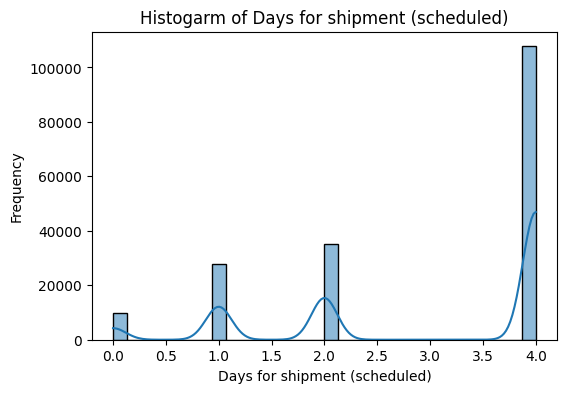

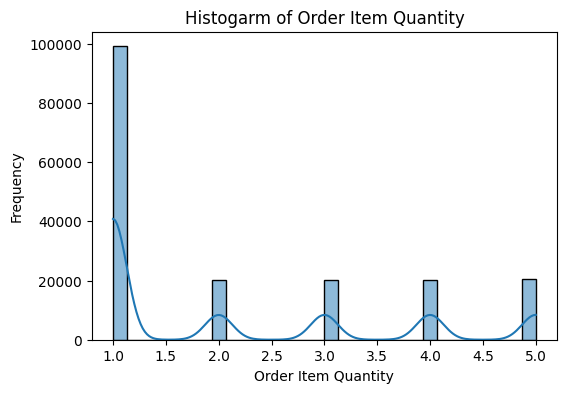

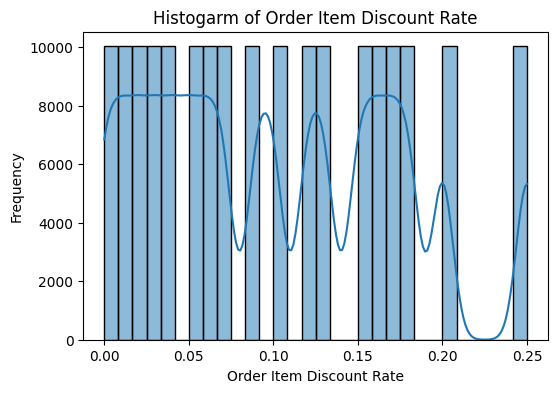

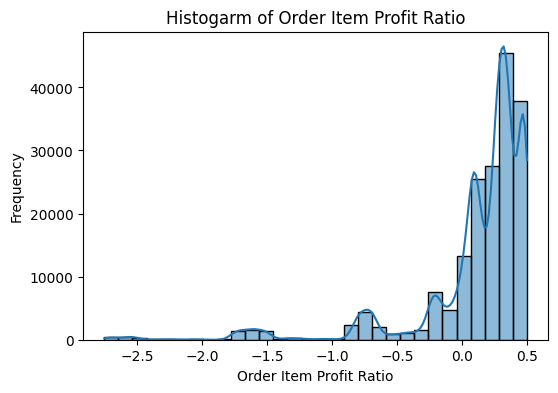

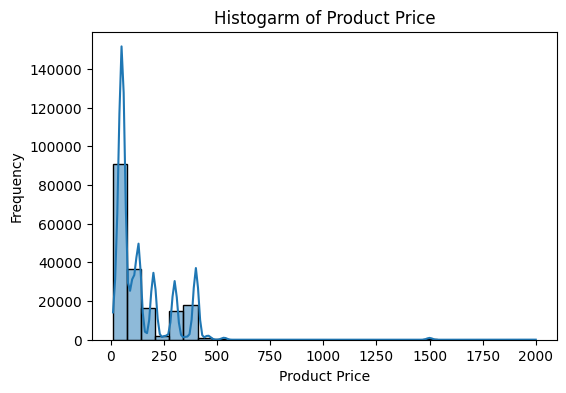

In [13]:
for col in numeric_col:
  plt.figure(figsize = (6,4))
  sns.histplot(new_data[col],bins = 30,kde = True)
  plt.title(f'Histogarm of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

TAKE A LOOK AT IT CAREFULLY

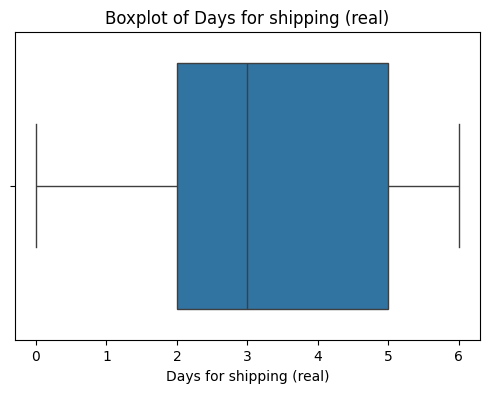

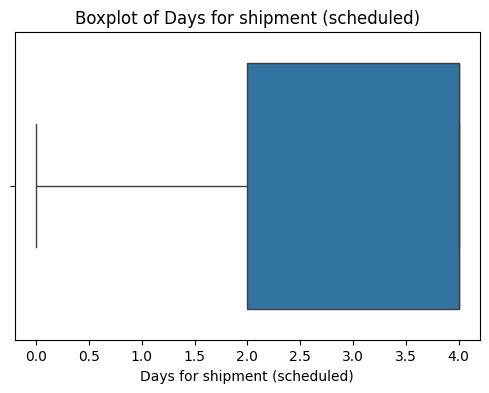

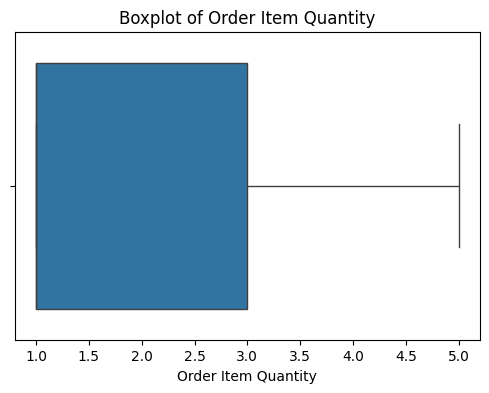

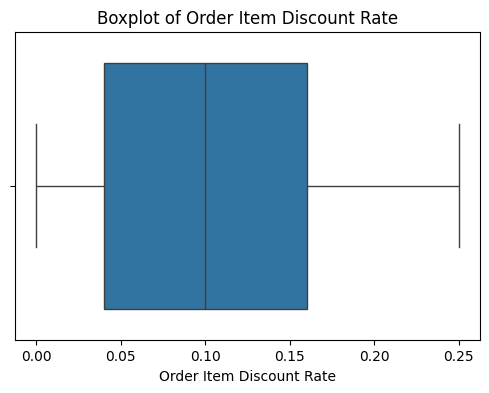

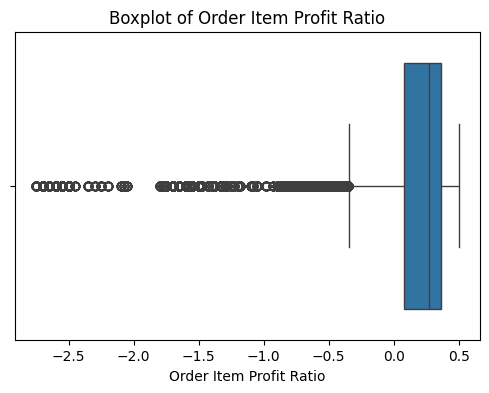

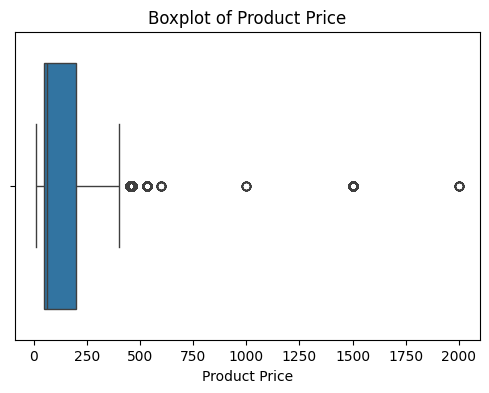

In [14]:
for col in numeric_col:
  plt.figure(figsize = (6,4))
  sns.boxplot(x = new_data[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.show()

IN THE ORDER ITEM PROFIT RATIO MAJORILY VALUES ARE CLUSTERED AROUND ZEROS OR NEGATIVE VALUES,INDICATING THAT A SIGNIFICANT PORTION OF ORDERS MAY BE GENERATING LOW OR NEGATIVE PROFIT.
IN PRODUCT PRICE VALUES ARE CONCENTRATED AT THE LOWER END WITH THE MEDIAN BELOW THE UPPER QUANTILE.
THERE ARE SEVERAL HIGH VALUE OUTLIERS

CAT --> NUMERIC

In [15]:
categorical_col = [
    'Shipping Mode',
    'Order Status',
    'Order Region',
    'Delivery Status',
    'Order State',
    'Category Name',
]

In [16]:
new_data_encoded = pd.get_dummies(new_data,columns = categorical_col,drop_first = True)


In [18]:
new_data_encoded.tail()

,Days for shipping (real),Days for shipment (scheduled),Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,shipping date (DateOrders),Late_delivery_risk,Shipping Mode_Same Day,Shipping Mode_Second Class,...,Category Name_Sporting Goods,Category Name_Strength Training,Category Name_Tennis & Racquet,Category Name_Toys,Category Name_Trade-In,Category Name_Video Games,Category Name_Water Sports,Category Name_Women's Apparel,Category Name_Women's Clothing,Category Name_Women's Golf Clubs
180514,4,4,1,0.00,0.10,399.980011,1/20/2016 3:40,0,False,False,...,False,False,False,False,False,False,False,False,False,False
180515,3,2,1,0.01,-1.55,399.980011,1/19/2016 1:34,1,False,True,...,False,False,False,False,False,False,False,False,False,False
180516,5,4,1,0.02,0.36,399.980011,1/20/2016 21:00,1,False,False,...,False,False,False,False,False,False,False,False,False,False
180517,3,4,1,0.03,0.48,399.980011,1/18/2016 20:18,0,False,False,...,False,False,False,False,False,False,False,False,False,False
180518,4,4,1,0.04,0.44,399.980011,1/19/2016 18:54,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
new_data_encoded.describe()

,Days for shipping (real),Days for shipment (scheduled),Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,Late_delivery_risk
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,2.127638,0.101668,0.120647,141.232550,0.548291
std,1.623722,1.374449,1.453451,0.070415,0.466796,139.732492,0.497664
min,0.000000,0.000000,1.000000,0.000000,-2.750000,9.990000,0.000000
25%,2.000000,2.000000,1.000000,0.040000,0.080000,50.000000,0.000000
50%,3.000000,4.000000,1.000000,0.100000,0.270000,59.990002,1.000000
75%,5.000000,4.000000,3.000000,0.160000,0.360000,199.990005,1.000000
max,6.000000,4.000000,5.000000,0.250000,0.500000,1999.989990,1.000000


In [23]:
new_data_encoded.shape

(180519, 1181)

In [27]:
unique_region_count = new_data['Order Region'].nunique()
print(unique_region_count)

23


In [25]:
region_counts = new_data['Order Region'].value_counts()

In [26]:
region_counts

,count
Order Region,
Central America,28341
Western Europe,27109
South America,14935
Oceania,10148
Northern Europe,9792
Southeast Asia,9539
Southern Europe,9431
Caribbean,8318
West of USA,7993


In [29]:
data_sa = new_data[new_data['Order Region'] == 'South Asia'].copy()
data = data_sa.drop('Order Region',axis = 1)
data

,Days for shipping (real),Days for shipment (scheduled),Shipping Mode,Order Status,Delivery Status,Order State,Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,Category Name,shipping date (DateOrders),Late_delivery_risk
1,5,4,Standard Class,PENDING,Late delivery,Rajastán,1,0.05,-0.80,327.750000,Sporting Goods,1/18/2018 12:27,1
2,4,4,Standard Class,CLOSED,Shipping on time,Rajastán,1,0.06,-0.80,327.750000,Sporting Goods,1/17/2018 12:06,0
13,2,1,First Class,COMPLETE,Late delivery,Maharashtra,1,0.25,0.10,327.750000,Sporting Goods,1/15/2018 8:15,1
14,2,1,First Class,PROCESSING,Late delivery,Maharashtra,1,0.00,0.05,327.750000,Sporting Goods,1/15/2018 7:54,1
15,2,1,First Class,COMPLETE,Late delivery,Maharashtra,1,0.01,-0.80,327.750000,Sporting Goods,1/15/2018 7:33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180488,2,4,Standard Class,PENDING_PAYMENT,Advance shipping,Jharkhand,1,0.12,0.26,399.980011,Fishing,1/19/2016 10:30,0
180490,4,4,Standard Class,SUSPECTED_FRAUD,Shipping canceled,Madhya Pradesh,1,0.15,-0.18,399.980011,Fishing,1/21/2016 5:56,0
180493,2,4,Standard Class,COMPLETE,Advance shipping,Andhra Pradesh,1,0.18,0.29,399.980011,Fishing,1/18/2016 23:59,0
180494,2,4,Standard Class,COMPLETE,Advance shipping,Andhra Pradesh,1,0.20,0.36,399.980011,Fishing,1/18/2016 23:59,0


In [30]:
data['shipping date (DateOrders)'] = pd.to_datetime(data['shipping date (DateOrders)'], errors='coerce')


In [31]:
data.head()

,Days for shipping (real),Days for shipment (scheduled),Shipping Mode,Order Status,Delivery Status,Order State,Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,Category Name,shipping date (DateOrders),Late_delivery_risk
1,5,4,Standard Class,PENDING,Late delivery,Rajastán,1,0.05,-0.80,327.75,Sporting Goods,2018-01-18 12:27:00,1
2,4,4,Standard Class,CLOSED,Shipping on time,Rajastán,1,0.06,-0.80,327.75,Sporting Goods,2018-01-17 12:06:00,0
13,2,1,First Class,COMPLETE,Late delivery,Maharashtra,1,0.25,0.10,327.75,Sporting Goods,2018-01-15 08:15:00,1
14,2,1,First Class,PROCESSING,Late delivery,Maharashtra,1,0.00,0.05,327.75,Sporting Goods,2018-01-15 07:54:00,1
15,2,1,First Class,COMPLETE,Late delivery,Maharashtra,1,0.01,-0.80,327.75,Sporting Goods,2018-01-15 07:33:00,1


In [33]:
categorical_col = [
    'Shipping Mode',
    'Order Status',
    'Delivery Status',
    'Order State',
    'Category Name',
]

In [35]:
data_encoded = pd.get_dummies(data,columns = categorical_col,drop_first = True)
data_encoded.head()

,Days for shipping (real),Days for shipment (scheduled),Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,shipping date (DateOrders),Late_delivery_risk,Shipping Mode_Same Day,Shipping Mode_Second Class,...,Category Name_Pet Supplies,Category Name_Shop By Sport,Category Name_Sporting Goods,Category Name_Tennis & Racquet,Category Name_Toys,Category Name_Trade-In,Category Name_Video Games,Category Name_Water Sports,Category Name_Women's Apparel,Category Name_Women's Clothing
1,5,4,1,0.05,-0.80,327.75,2018-01-18 12:27:00,1,False,False,...,False,False,True,False,False,False,False,False,False,False
2,4,4,1,0.06,-0.80,327.75,2018-01-17 12:06:00,0,False,False,...,False,False,True,False,False,False,False,False,False,False
13,2,1,1,0.25,0.10,327.75,2018-01-15 08:15:00,1,False,False,...,False,False,True,False,False,False,False,False,False,False
14,2,1,1,0.00,0.05,327.75,2018-01-15 07:54:00,1,False,False,...,False,False,True,False,False,False,False,False,False,False
15,2,1,1,0.01,-0.80,327.75,2018-01-15 07:33:00,1,False,False,...,False,False,True,False,False,False,False,False,False,False


1181 columns --> 128 columns

In [36]:
data_encoded.to_csv('Southasia_orders.csv',index = False)

In [42]:
data_encoded['ship_weekday'] = data_encoded['shipping date (DateOrders)'].dt.weekday
data_encoded['ship_month']   = data_encoded['shipping date (DateOrders)'].dt.month


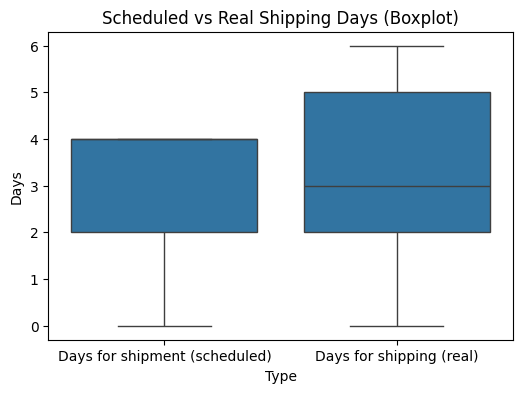

In [41]:
data_box = data_encoded[['Days for shipment (scheduled)', 'Days for shipping (real)']]
data_box_melted = data_box.melt(var_name='Type', value_name='Days')

plt.figure(figsize=(6, 4))
sns.boxplot(x='Type', y='Days', data=data_box_melted)
plt.title('Scheduled vs Real Shipping Days (Boxplot)')
plt.xlabel('Type')
plt.ylabel('Days')
plt.show()

DUE TO THE MEDIAN WHICH IS HIGH FOR THE SHIPPING IT MAY INDICATE THAT THE ACTUAL SHIPPING TENDS TO BE LONGER THAN SCHEDULED TIMES FOR MANY ORDERS CAUSING DELAY BEFORE SHIPMENT


In [43]:
month_delay = data_encoded.groupby('ship_month')['Late_delivery_risk'].mean()

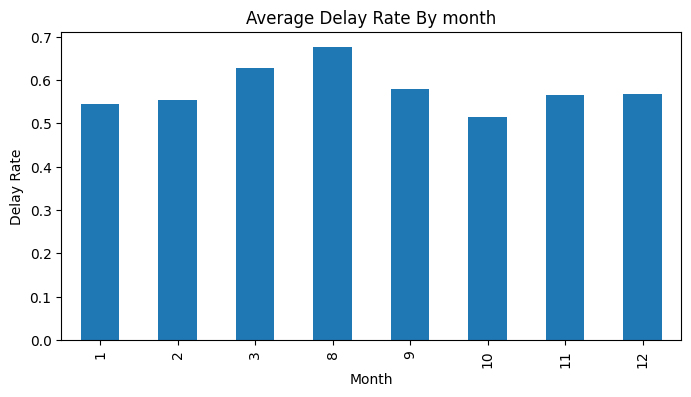

In [48]:
plt.figure(figsize = (8,4))
month_delay.plot(kind = 'bar')
plt.xlabel("Month")
plt.ylabel("Delay Rate")
plt.title("Average Delay Rate By month")
plt.show()

 DELAYS RATES ARE HIGH IN MARCH,AUGUST AND ALSO REST OF ALL TOO HAVE SOME HIGH DELAYS THOUGH

In [49]:
print(data_encoded['ship_month'].value_counts().sort_index())

ship_month
1     1835
2     1156
3      679
8       31
9      292
10     483
11    1518
12    1737
Name: count, dtype: int64


THERE ARE NO ORDERS IN THE 4,5,6 MONTHS
DOES IT TELL SOMETHING?

OR DUE TO THE FILTERING STEP MIGHT HAVE DELETED THE MONTHS

In [57]:
week_delay = data_encoded.groupby('ship_weekday')['Late_delivery_risk'].mean()

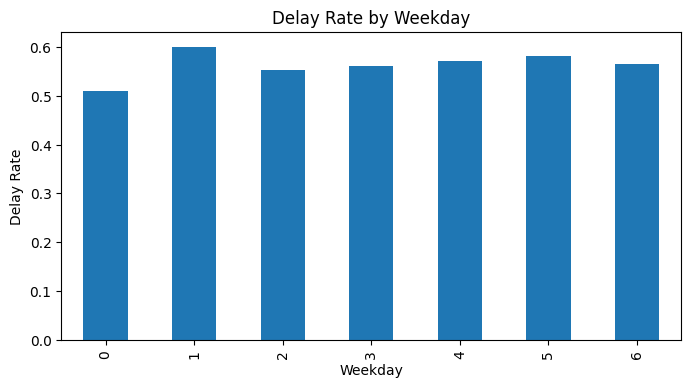

In [58]:
plt.figure(figsize=(8, 4))
week_delay.plot(kind='bar')
plt.xlabel('Weekday')
plt.ylabel('Delay Rate')
plt.title('Delay Rate by Weekday')
plt.show()

EACH BAR SHOWS THE AVG PROPORTION OF SHIPMENTS MARKED AS LATE FOR THAT SPECIFIC WEEKDAY
AND ALL OF THE DAYs ARE MOSTLY MARKED AS LATE

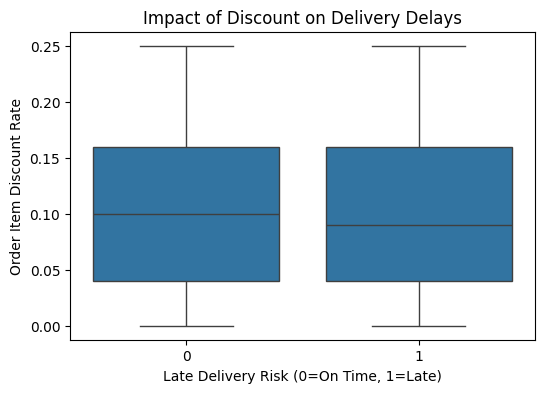

In [59]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Late_delivery_risk', y='Order Item Discount Rate', data=data_encoded)
plt.xlabel('Late Delivery Risk (0=On Time, 1=Late)')
plt.ylabel('Order Item Discount Rate')
plt.title('Impact of Discount on Delivery Delays')
plt.show()


There is no major or visible diffrence beweeen the discount rates of late and ontime orders
It might be becasue of the moderate imbalance of the data in late_delivery_risk

In [60]:
data_encoded['Discount Group'] = pd.cut(data_encoded['Order Item Discount Rate'],bins = 5)
discount_delay_rate = data_encoded.groupby('Discount Group')['Late_delivery_risk'].mean()

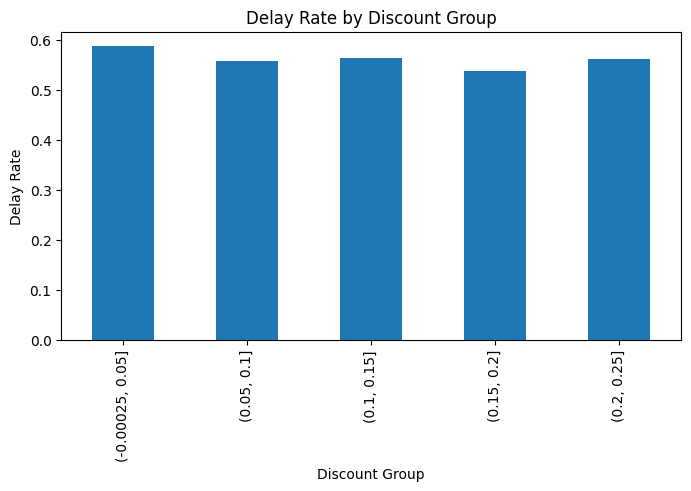

In [61]:
plt.figure(figsize = (8,4))
discount_delay_rate.plot(kind = 'bar')
plt.xlabel('Discount Group')
plt.ylabel('Delay Rate')
plt.title('Delay Rate by Discount Group')
plt.show()

In [62]:
data_encoded

,Product Price
1,327.750000
2,327.750000
13,327.750000
14,327.750000
15,327.750000
...,...
180488,399.980011
180490,399.980011
180493,399.980011
180494,399.980011


In [64]:
corr_mat = data_encoded.drop(columns=['Discount Group']).corr()
corr_mat

,Days for shipping (real),Days for shipment (scheduled),Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,shipping date (DateOrders),Late_delivery_risk,Shipping Mode_Same Day,Shipping Mode_Second Class,...,Category Name_Sporting Goods,Category Name_Tennis & Racquet,Category Name_Toys,Category Name_Trade-In,Category Name_Video Games,Category Name_Water Sports,Category Name_Women's Apparel,Category Name_Women's Clothing,ship_weekday,ship_month
Days for shipping (real),1.000000,0.504120,-0.000075,0.005526,0.008498,-0.000729,0.018552,0.387163,-0.419917,0.168051,...,0.000272,-0.022547,0.004625,-0.010574,0.005950,0.002374,0.010114,0.015703,-0.023856,0.009064
Days for shipment (scheduled),0.504120,1.000000,0.008973,0.029880,0.000034,0.004355,0.028188,-0.399791,-0.480847,-0.330542,...,0.005197,0.000555,0.007117,-0.000112,0.004534,-0.024359,-0.006615,0.008782,-0.030139,0.004297
Order Item Quantity,-0.000075,0.008973,1.000000,0.003466,-0.013478,-0.470608,-0.266362,-0.006072,-0.006708,-0.011231,...,-0.072858,0.026004,-0.073323,0.045205,-0.115042,-0.204974,0.232192,-0.097733,-0.006915,0.008635
Order Item Discount Rate,0.005526,0.029880,0.003466,1.000000,-0.001843,0.006725,-0.005927,-0.022419,-0.024022,-0.003136,...,-0.017917,0.003298,0.006515,0.011201,-0.004209,0.019553,-0.008478,-0.007278,0.000644,-0.009025
Order Item Profit Ratio,0.008498,0.000034,-0.013478,-0.001843,1.000000,0.002000,0.009856,0.011235,0.016743,0.010381,...,0.001036,-0.004403,0.004801,0.009655,-0.010446,-0.010779,-0.006682,-0.002529,-0.002870,0.007540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Category Name_Water Sports,0.002374,-0.024359,-0.204974,0.019553,-0.010779,0.111480,-0.101879,0.027037,0.007640,0.035146,...,-0.029045,-0.011732,-0.029230,-0.020872,-0.045861,1.000000,-0.094109,-0.038961,0.012811,0.000900
Category Name_Women's Apparel,0.010114,-0.006615,0.232192,-0.008478,-0.006682,-0.225964,-0.126486,0.014592,-0.004158,-0.009531,...,-0.033451,-0.013512,-0.033665,-0.024039,-0.052819,-0.094109,1.000000,-0.044872,0.009332,-0.038685
Category Name_Women's Clothing,0.015703,0.008782,-0.097733,-0.007278,-0.002529,0.068638,0.302348,-0.002604,0.004870,0.020981,...,-0.013849,-0.005594,-0.013937,-0.009952,-0.021867,-0.038961,-0.044872,1.000000,-0.001835,-0.030614
ship_weekday,-0.023856,-0.030139,-0.006915,0.000644,-0.002870,-0.005446,0.007889,0.023381,0.027639,0.020931,...,-0.007866,0.015807,0.009284,0.002946,-0.028838,0.012811,0.009332,-0.001835,1.000000,0.007178


In [65]:
print(corr_mat['Late_delivery_risk'].sort_values(ascending = False))

Delivery Status_Late delivery        1.000000
Late_delivery_risk                   1.000000
Days for shipping (real)             0.387163
Shipping Mode_Second Class           0.211395
Order Status_COMPLETE                0.053104
                                       ...   
Order Status_SUSPECTED_FRAUD        -0.156267
Delivery Status_Shipping canceled   -0.218249
Days for shipment (scheduled)       -0.399791
Shipping Mode_Standard Class        -0.432564
Delivery Status_Shipping on time    -0.519386
Name: Late_delivery_risk, Length: 130, dtype: float64


WHAT I THINK IS THAT THE HIGHEST POSITIVE AND NEGATIVE ARE THE MOST IMPORTANT PREDICTOR FOR LATE DELIVERY RISK

FIRST LETS TRAIN WITH THESE FEATURES

In [78]:
try_features = [
    'Days for shipping (real)',
    'Days for shipment (scheduled)',
    'Shipping Mode_Second Class',
    'Order Status_COMPLETE',
    'Shipping Mode_Standard Class',
    #'Delivery Status_Late delivery',
    'Delivery Status_Shipping on time'
]

In [79]:
X = data_encoded[try_features]
y = data_encoded['Late_delivery_risk']

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify = y)


In [81]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter = 500)
model_lr.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [82]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred_lr = model_lr.predict(X_test)
print("0Accuracy:",accuracy_score(y_test,y_test))
print("Classification report:",classification_report(y_test,y_pred_lr))

0Accuracy: 1.0
Classification report:               precision    recall  f1-score   support

           0       1.00      0.95      0.98       677
           1       0.96      1.00      0.98       870

    accuracy                           0.98      1547
   macro avg       0.98      0.98      0.98      1547
weighted avg       0.98      0.98      0.98      1547



In [83]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)


RandomForestClassifier()

In [84]:
y_pred_rf = model_rf.predict(X_test)
print("0Accuracy:",accuracy_score(y_test,y_test))
print("Classification report:",classification_report(y_test,y_pred_rf))

0Accuracy: 1.0
Classification report:               precision    recall  f1-score   support

           0       1.00      0.95      0.98       677
           1       0.96      1.00      0.98       870

    accuracy                           0.98      1547
   macro avg       0.98      0.98      0.98      1547
weighted avg       0.98      0.98      0.98      1547



In [77]:
data_encoded['Delivery Status_Late delivery']

,Delivery Status_Late delivery
1,True
2,False
13,True
14,True
15,True
...,...
180488,False
180490,False
180493,False
180494,False
